In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [113]:
telecom_df = pd.read_csv('churn.csv')
telecom_df.shape

(20000, 12)

In [114]:
#Check for null values
telecom_df.isna().sum()

COLLEGE                        0
INCOME                         0
OVERAGE                        0
LEFTOVER                       0
HOUSE                          0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
LEAVE                          0
dtype: int64

No missing data. Hence, we need not do K-NN, Mean or median imputation.

In [115]:
telecom_df.LEAVE.value_counts()

STAY     10148
LEAVE     9852
Name: LEAVE, dtype: int64

The data is balanced. Hence we need not perform Under-sampling or over-sampling.

Output is balanced

In [70]:
#Converting the predictor variable to a numeric variable
telecom_df['LEAVE'].replace(to_replace='STAY', value=0, inplace=True)
telecom_df['LEAVE'].replace(to_replace='LEAVE', value=1, inplace=True)

In [117]:
#Look for distributions of other predictor variables
telecom_df.COLLEGE.value_counts()


one     10048
zero     9952
Name: COLLEGE, dtype: int64

In [118]:
telecom_df.REPORTED_SATISFACTION.value_counts()

very_unsat    7909
very_sat      5053
unsat         3991
avg           2022
sat           1025
Name: REPORTED_SATISFACTION, dtype: int64

In [119]:
telecom_df.REPORTED_USAGE_LEVEL.value_counts()

little         7875
very_high      5109
very_little    4021
high           2000
avg             995
Name: REPORTED_USAGE_LEVEL, dtype: int64

In [120]:
telecom_df.CONSIDERING_CHANGE_OF_PLAN.value_counts()

considering                 7920
actively_looking_into_it    4994
no                          4038
never_thought               1995
perhaps                     1053
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64

## Exploratory Data Analysis ###


Text(0.5,1,'% of Chunred Customers')

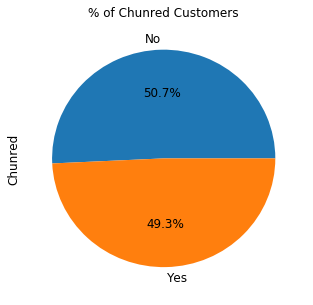

In [121]:
ax = (telecom_df['LEAVE'].value_counts()*100.0 /len(telecom_df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Chunred',fontsize = 12)
ax.set_title('% of Chunred Customers', fontsize = 12)

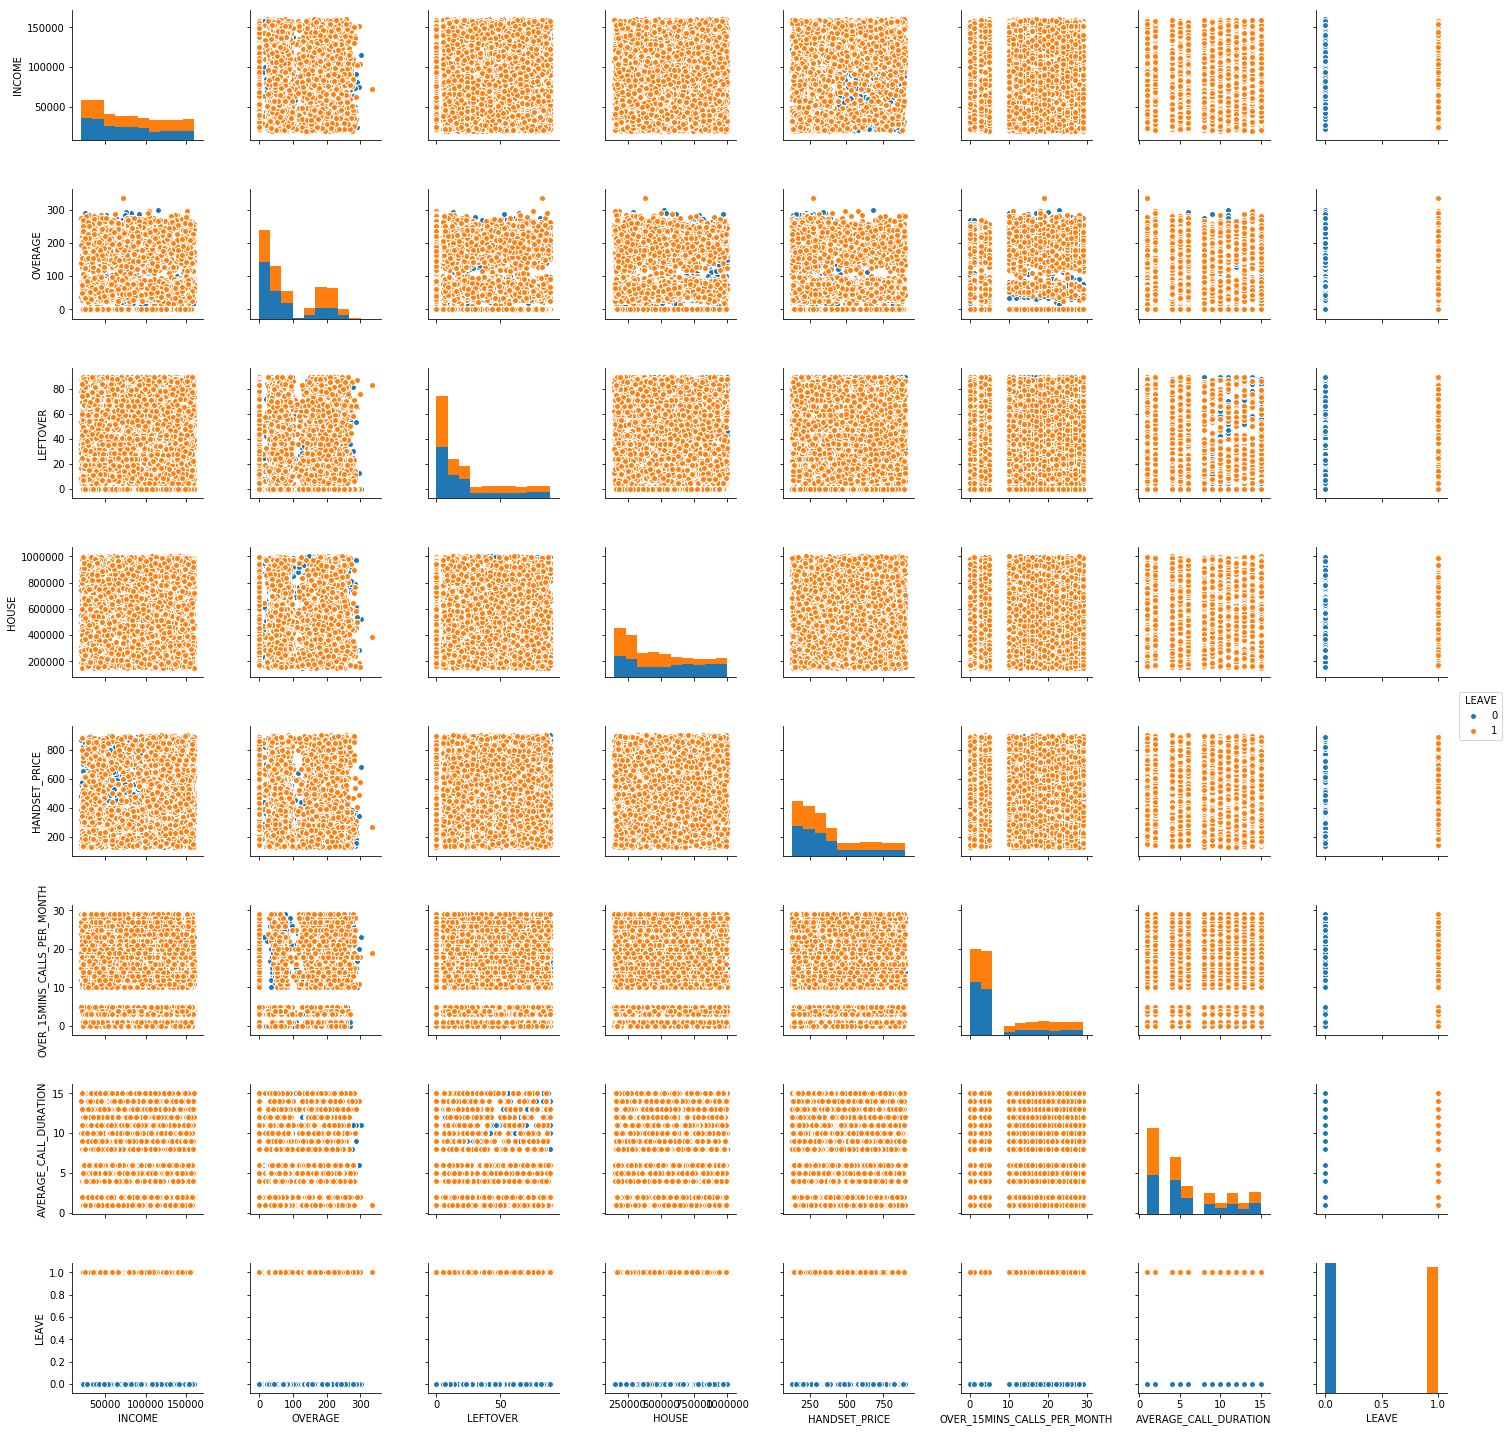

In [122]:
# Create the default pairplot
sns.pairplot(telecom_df, hue = 'LEAVE')

In [71]:
telecom_df.corr()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,LEAVE
INCOME,1.000000,0.000458,0.006515,-0.010964,0.727200,0.002136,-0.007219,0.096320
OVERAGE,0.000458,1.000000,-0.003123,0.002412,0.000324,0.770557,0.000653,0.235139
LEFTOVER,0.006515,-0.003123,1.000000,0.006530,0.004004,-0.010411,-0.660285,0.060540
HOUSE,-0.010964,0.002412,0.006530,1.000000,-0.007756,0.007410,-0.009359,-0.211213
HANDSET_PRICE,0.727200,0.000324,0.004004,-0.007756,1.000000,0.002680,-0.005190,0.089221
OVER_15MINS_CALLS_PER_MONTH,0.002136,0.770557,-0.010411,0.007410,0.002680,1.000000,0.007769,0.202193
AVERAGE_CALL_DURATION,-0.007219,0.000653,-0.660285,-0.009359,-0.005190,0.007769,1.000000,-0.008704
LEAVE,0.096320,0.235139,0.060540,-0.211213,0.089221,0.202193,-0.008704,1.000000


###### From the above, overage and OVER_15MINS_CALLS_PER_MONTH seem to be correlated with Leaving the telecom provider.

In [124]:
# telecom_df.INCOME.var()

1737271275.867975

In [125]:
# telecom_df.HANDSET_PRICE.var()

45719.28421620052

In [126]:
# telecom_df.OVERAGE.var()

7394.679865790882

In [127]:
# telecom_df.OVER_15MINS_CALLS_PER_MONTH.var()

79.66308266412139

In [128]:
# telecom_df.pop('HANDSET_PRICE')
# telecom_df.pop('OVER_15MINS_CALLS_PER_MONTH')

In [129]:
telecom_df.shape

(20000, 12)

### Pre-Processing ###

Convert Categorical Variables into Dummy Variables

In [130]:
#Convert college values to 0 and 1
telecom_df['COLLEGE'].replace(to_replace='zero', value=0, inplace=True)
telecom_df['COLLEGE'].replace(to_replace='one', value=1, inplace=True)

# One hot encoding for REPORTED_SATISFACTION
dummy = pd.get_dummies(telecom_df['REPORTED_SATISFACTION'])

telecom_df = pd.concat([telecom_df,dummy],axis = 1)

telecom_df = telecom_df.drop('REPORTED_SATISFACTION', 1)

# One hot encoding for REPORTED_USAGE_LEVEL
dummy = pd.get_dummies(telecom_df['REPORTED_USAGE_LEVEL'])

telecom_df = pd.concat([telecom_df,dummy],axis = 1)

telecom_df = telecom_df.drop('REPORTED_USAGE_LEVEL', 1)

# One hot encoding for CONSIDERING_CHANGE_OF_PLAN
dummy = pd.get_dummies(telecom_df['CONSIDERING_CHANGE_OF_PLAN'])

telecom_df = pd.concat([telecom_df,dummy],axis = 1)

telecom_df = telecom_df.drop('CONSIDERING_CHANGE_OF_PLAN', 1)

In [131]:
telecom_df.shape

(20000, 24)

In [132]:
telecom_df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,LEAVE,avg,...,avg,high,little,very_high,very_little,actively_looking_into_it,considering,never_thought,no,perhaps
0,0,31953,0,6,313378,161,0,4,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,36147,0,13,800586,244,0,6,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,27273,230,0,305049,201,16,15,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,120070,38,33,788235,780,3,2,1,0,...,0,0,0,1,0,0,1,0,0,0
4,1,29215,208,85,224784,241,21,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [133]:
#Step 9 Moving the target columns to the end 
LEAVE = telecom_df.pop('LEAVE') 
telecom_df['LEAVE'] = LEAVE

In [134]:
# Split data into test and train
train, test = train_test_split(telecom_df, test_size=0.25, random_state = 1)

# Seperate inputs and outputs
n,m = telecom_df.shape

train_input  = train.iloc[:,:m-1]
train_output  = train.iloc[:,-1]

test_input  = test.iloc[:,:m-1]
test_ouput  = test.iloc[:,-1]


In [135]:
test_ouput.head()

11456    1
16528    0
3253     1
18614    1
1544     0
Name: LEAVE, dtype: int64

### Logistic Regression ###

In [136]:
logisticRegr = LogisticRegression()

lm = logisticRegr.fit(train_input, train_output)

lm_predict = lm.predict(test_input)
lm_predict_prob = lm.predict_proba(test_input)[:,1]

accuracy_score(test_ouput, lm_predict)*100

62.78

In [137]:
pd.DataFrame(
    confusion_matrix(test_ouput, lm_predict),
    columns=['Predicted Negative', 'Predicted Positive'],
    index=['Actually Negative', 'Actually Positive']
)

,Predicted Negative,Predicted Positive
Actually Negative,1631,916
Actually Positive,945,1508


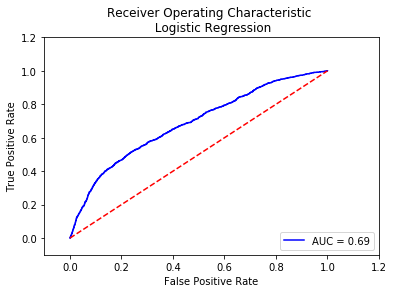

In [138]:
false_positive_rate_log, true_positive_rate_log, thresholds_log = roc_curve(test_ouput, lm_predict_prob)
roc_auc_log = auc(false_positive_rate_log, true_positive_rate_log)


plt.title('Receiver Operating Characteristic \n Logistic Regression')
plt.plot(false_positive_rate_log, true_positive_rate_log, 'b',
label='AUC = %0.2f'% roc_auc_log)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest ###

In [139]:
clf=RandomForestClassifier(n_estimators=50,random_state=0)
rf = clf.fit(train_input, train_output)
Y_rf = clf.predict(test_input)
Y_rf_prob = clf.predict_proba(test_input)[:,1]

accuracy_score(test_ouput, Y_rf)*100

68.38

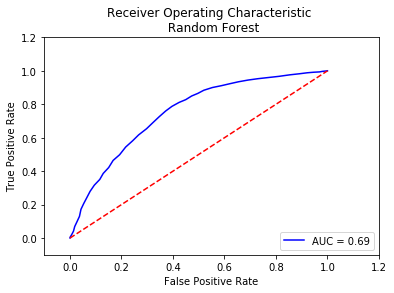

In [140]:
false_positive_rate_rf, true_positive_rate_rf, thresholds_log = roc_curve(test_ouput, Y_rf_prob)
roc_auc_rf = auc(false_positive_rate_rf, true_positive_rate_rf)


plt.title('Receiver Operating Characteristic \n Random Forest')
plt.plot(false_positive_rate_rf, true_positive_rate_rf, 'b',
label='AUC = %0.2f'% roc_auc_log)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gradient Boosting Classifier ###

In [141]:
gbc = GradientBoostingClassifier()
gbc.fit(train_input, train_output)
Y_gbc = gbc.predict(test_input)
Y_gbc_prob = gbc.predict_proba(test_input)[:,1]

accuracy_score(test_ouput, Y_gbc)*100

70.08

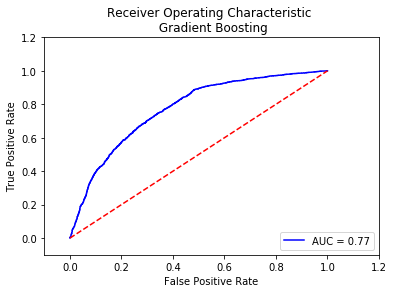

In [142]:
false_positive_rate_gbc, true_positive_rate_gbc, thresholds_log = roc_curve(test_ouput, Y_gbc_prob)
roc_auc_gbc = auc(false_positive_rate_gbc, true_positive_rate_gbc)

plt.title('Receiver Operating Characteristic \n Gradient Boosting')
plt.plot(false_positive_rate_gbc, true_positive_rate_gbc, 'b',
label='AUC = %0.2f'% roc_auc_gbc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### AUC is measure that shows how good a model classifies the classes. From the above, we can see that Gradient boosting > Random Forest > Logistic Regression.

#### Both the accuracy and AUC have improved from Logistic to Gradient Boosting Algorithm. Hence, in this problem, out of the Models tested, Gradient boosting seems to perform better.

#### Further, using K-fold cross validation and hyper paramater tuning we can obtain better models to generalize the data.